# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random
import sys
from citipy import citipy
from pprint import pprint

#fetching the 
#url = "https://pypi.python.org/pypi/citipy"

# Import API key
#from api_keys import api_key

url = f"http://api.openweathermap.org/data/2.5/weather?q=London,uk&apikey=e94b830bfcfe5fd7dedb86c038248ab7"

units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# testing
print(requests.get(url))

<Response [200]>


In [3]:
#viewing the json for the weather for one city, London
pprint(requests.get(url).json())

{'base': 'stations',
 'clouds': {'all': 22},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1565552404,
 'id': 2643743,
 'main': {'humidity': 68,
          'pressure': 1012,
          'temp': 289.75,
          'temp_max': 292.15,
          'temp_min': 287.04},
 'name': 'London',
 'rain': {'1h': 0.51},
 'sys': {'country': 'GB',
         'id': 1414,
         'message': 0.0107,
         'sunrise': 1565498348,
         'sunset': 1565551955,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'shower rain',
              'icon': '09n',
              'id': 521,
              'main': 'Rain'},
             {'description': 'thunderstorm',
              'icon': '11n',
              'id': 211,
              'main': 'Thunderstorm'}],
 'wind': {'deg': 230, 'speed': 5.1}}


In [23]:
######################################################################################################################

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=4000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=4000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

1259

In [5]:
#view list of random cities
cities

['mount darwin',
 'codrington',
 'taolanaro',
 'port alfred',
 'saint-philippe',
 'bengkulu',
 'mataura',
 'barentsburg',
 'moen',
 'airai',
 'rio grande',
 'ushuaia',
 'east london',
 'vaini',
 'souillac',
 'alotau',
 'moose factory',
 'cartagena',
 'alekseyevka',
 'price',
 'mar del plata',
 'rikitea',
 'ust-kuyga',
 'bethel',
 'busselton',
 'bambanglipuro',
 'haldibari',
 'tuktoyaktuk',
 'buala',
 'bowen',
 'alice springs',
 'oktyabrskoye',
 'klaksvik',
 'tiksi',
 'hasaki',
 'hermanus',
 'antalaha',
 'avarua',
 'cherskiy',
 'yaan',
 'karachev',
 'kangaatsiaq',
 'itarema',
 'dikson',
 'takoradi',
 'tadine',
 'jamestown',
 'punta arenas',
 'namibe',
 'qaanaaq',
 'cidreira',
 'bluff',
 'cape town',
 'joigny',
 'albany',
 'shingu',
 'ozgon',
 'illoqqortoormiut',
 'georgetown',
 'mount isa',
 'hobart',
 'banda aceh',
 'morant bay',
 'makakilo city',
 'saravan',
 'mrirt',
 'tantangan',
 'hilo',
 'amderma',
 'castro',
 'bredasdorp',
 'tawkar',
 'itoigawa',
 'kaitangata',
 'garowe',
 'clovi

In [6]:
print(lat_lngs)

In [27]:
######################################################################################################################

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
######################################################################################################################

In [7]:
#Identify the end point for getting the weather data of each city
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "imperial"
query_url = f"{base_url}appid=e94b830bfcfe5fd7dedb86c038248ab7&units={units}&q="


In [18]:
# Create lists for all the information that is being fetched
random_cities = []
cloudiness = []
countries = []
dates = []
humidities = []
latitudes = []
longitudes = []
max_temps = []
wind_speeds = []


In [19]:
#Get the weather data for each city in the random cities list
count = 1
for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        random_cities.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt']) 
        humidities.append(response['main']['humidity'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])

        print(f"getting weather data for {city}, {count} of {len(cities)}")
    except:
        print(f"weather data for ({city}) not found; getting weather for next city")
        
    count = count + 1

getting weather data for mount darwin, 1 of 1259
getting weather data for codrington, 2 of 1259
weather data for (taolanaro) not found; getting weather for next city
getting weather data for port alfred, 4 of 1259
getting weather data for saint-philippe, 5 of 1259
weather data for (bengkulu) not found; getting weather for next city
getting weather data for mataura, 7 of 1259
weather data for (barentsburg) not found; getting weather for next city
getting weather data for moen, 9 of 1259
getting weather data for airai, 10 of 1259
getting weather data for rio grande, 11 of 1259
getting weather data for ushuaia, 12 of 1259
getting weather data for east london, 13 of 1259
getting weather data for vaini, 14 of 1259
getting weather data for souillac, 15 of 1259
weather data for (alotau) not found; getting weather for next city
getting weather data for moose factory, 17 of 1259
getting weather data for cartagena, 18 of 1259
getting weather data for alekseyevka, 19 of 1259
getting weather data 

getting weather data for bilibino, 168 of 1259
getting weather data for carquefou, 169 of 1259
getting weather data for turan, 170 of 1259
getting weather data for waitati, 171 of 1259
weather data for (belushya guba) not found; getting weather for next city
getting weather data for benicarlo, 173 of 1259
getting weather data for mehamn, 174 of 1259
getting weather data for ribeira grande, 175 of 1259
getting weather data for san cristobal, 176 of 1259
getting weather data for kollam, 177 of 1259
getting weather data for kruisfontein, 178 of 1259
getting weather data for saint-francois, 179 of 1259
getting weather data for magistralnyy, 180 of 1259
getting weather data for lagos, 181 of 1259
getting weather data for kenai, 182 of 1259
getting weather data for arrifes, 183 of 1259
getting weather data for casablanca, 184 of 1259
getting weather data for longyearbyen, 185 of 1259
getting weather data for flinders, 186 of 1259
getting weather data for najran, 187 of 1259
getting weather d

getting weather data for labuan, 338 of 1259
getting weather data for mumford, 339 of 1259
getting weather data for katsuura, 340 of 1259
getting weather data for touros, 341 of 1259
getting weather data for chuy, 342 of 1259
getting weather data for port blair, 343 of 1259
getting weather data for richards bay, 344 of 1259
getting weather data for stromness, 345 of 1259
getting weather data for sesimbra, 346 of 1259
getting weather data for dicabisagan, 347 of 1259
getting weather data for warrnambool, 348 of 1259
getting weather data for arroyo, 349 of 1259
getting weather data for sao jose da coroa grande, 350 of 1259
getting weather data for sao filipe, 351 of 1259
getting weather data for slave lake, 352 of 1259
getting weather data for cabo san lucas, 353 of 1259
getting weather data for coquimbo, 354 of 1259
getting weather data for santa cruz, 355 of 1259
getting weather data for prince rupert, 356 of 1259
getting weather data for college, 357 of 1259
getting weather data for m

getting weather data for kalmunai, 503 of 1259
getting weather data for walvis bay, 504 of 1259
getting weather data for along, 505 of 1259
getting weather data for eyl, 506 of 1259
getting weather data for yatou, 507 of 1259
getting weather data for vierzon, 508 of 1259
weather data for (azimur) not found; getting weather for next city
getting weather data for kijini, 510 of 1259
getting weather data for kautokeino, 511 of 1259
getting weather data for dmitrovsk-orlovskiy, 512 of 1259
getting weather data for bakhmach, 513 of 1259
getting weather data for quirinopolis, 514 of 1259
getting weather data for havelock, 515 of 1259
getting weather data for aksarka, 516 of 1259
getting weather data for opuwo, 517 of 1259
getting weather data for chingirlau, 518 of 1259
getting weather data for wladyslawowo, 519 of 1259
getting weather data for nushki, 520 of 1259
getting weather data for pirapemas, 521 of 1259
getting weather data for fallon, 522 of 1259
getting weather data for guiglo, 523

getting weather data for aksu, 672 of 1259
getting weather data for portobelo, 673 of 1259
getting weather data for okha, 674 of 1259
getting weather data for fort nelson, 675 of 1259
getting weather data for ergani, 676 of 1259
getting weather data for bethlehem, 677 of 1259
getting weather data for ambovombe, 678 of 1259
weather data for (kamenskoye) not found; getting weather for next city
getting weather data for christchurch, 680 of 1259
getting weather data for seredka, 681 of 1259
getting weather data for alofi, 682 of 1259
getting weather data for cooma, 683 of 1259
getting weather data for gobo, 684 of 1259
getting weather data for sangareddi, 685 of 1259
getting weather data for nanakuli, 686 of 1259
weather data for (palabuhanratu) not found; getting weather for next city
getting weather data for williams lake, 688 of 1259
getting weather data for sobolevo, 689 of 1259
getting weather data for kirksville, 690 of 1259
weather data for (longlac) not found; getting weather for 

getting weather data for kysyl-syr, 839 of 1259
getting weather data for englehart, 840 of 1259
getting weather data for jinxiang, 841 of 1259
getting weather data for coihaique, 842 of 1259
getting weather data for nantucket, 843 of 1259
getting weather data for itaituba, 844 of 1259
getting weather data for chadiza, 845 of 1259
getting weather data for strezhevoy, 846 of 1259
getting weather data for tari, 847 of 1259
getting weather data for murray bridge, 848 of 1259
getting weather data for shinuhayr, 849 of 1259
getting weather data for litovko, 850 of 1259
getting weather data for anqing, 851 of 1259
getting weather data for mahajanga, 852 of 1259
weather data for (chagda) not found; getting weather for next city
weather data for (bolungarvik) not found; getting weather for next city
getting weather data for nuevo progreso, 855 of 1259
getting weather data for nalut, 856 of 1259
getting weather data for sechura, 857 of 1259
getting weather data for bandrele, 858 of 1259
getting 

getting weather data for verkhniy mamon, 1007 of 1259
getting weather data for bacolod, 1008 of 1259
weather data for (akyab) not found; getting weather for next city
getting weather data for high rock, 1010 of 1259
getting weather data for mikuni, 1011 of 1259
getting weather data for port lincoln, 1012 of 1259
getting weather data for pskov, 1013 of 1259
getting weather data for ekangala, 1014 of 1259
getting weather data for north bend, 1015 of 1259
getting weather data for tallahassee, 1016 of 1259
getting weather data for madera, 1017 of 1259
getting weather data for point pedro, 1018 of 1259
getting weather data for channel-port aux basques, 1019 of 1259
getting weather data for mangrol, 1020 of 1259
getting weather data for liverpool, 1021 of 1259
getting weather data for pandan, 1022 of 1259
getting weather data for jalu, 1023 of 1259
getting weather data for tessalit, 1024 of 1259
getting weather data for tumpat, 1025 of 1259
getting weather data for pasvalys, 1026 of 1259
get

getting weather data for boende, 1172 of 1259
getting weather data for sungairaya, 1173 of 1259
getting weather data for raudeberg, 1174 of 1259
getting weather data for nisia floresta, 1175 of 1259
getting weather data for salinopolis, 1176 of 1259
getting weather data for rocha, 1177 of 1259
getting weather data for athens, 1178 of 1259
getting weather data for killarney, 1179 of 1259
getting weather data for mandsaur, 1180 of 1259
getting weather data for zwedru, 1181 of 1259
getting weather data for pitkyaranta, 1182 of 1259
getting weather data for rudnogorsk, 1183 of 1259
getting weather data for beloha, 1184 of 1259
getting weather data for marsa matruh, 1185 of 1259
getting weather data for san policarpo, 1186 of 1259
getting weather data for brus, 1187 of 1259
getting weather data for plymouth, 1188 of 1259
weather data for (olafsvik) not found; getting weather for next city
getting weather data for araouane, 1190 of 1259
getting weather data for west bay, 1191 of 1259
getting

In [32]:
#####################################################################################################################

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
#create dictionary of lists of cities and respective weather data:
weather_dictionary = {
                'City': random_cities,
                'Cloudiness': cloudiness,
                'Country': countries,
                'Date': dates,
                'Humidity': humidities,
                'Latitude': latitudes,
                'Longitude': longitudes,
                'Max Temp F': max_temps,
                'Wind Speed': wind_speeds
}

In [21]:
weather_dictionary

{'City': ['Mount Darwin',
  'Codrington',
  'Port Alfred',
  'Saint-Philippe',
  'Mataura',
  'Moen',
  'Airai',
  'Rio Grande',
  'Ushuaia',
  'East London',
  'Vaini',
  'Souillac',
  'Moose Factory',
  'Cartagena',
  'Alekseyevka',
  'Price',
  'Mar del Plata',
  'Rikitea',
  'Ust-Kuyga',
  'Bethel',
  'Busselton',
  'Bambanglipuro',
  'Haldibari',
  'Tuktoyaktuk',
  'Buala',
  'Bowen',
  'Alice Springs',
  'Oktyabrskoye',
  'Klaksvik',
  'Tiksi',
  'Hasaki',
  'Hermanus',
  'Antalaha',
  'Avarua',
  'Cherskiy',
  'Yaan',
  'Karachev',
  'Kangaatsiaq',
  'Itarema',
  'Dikson',
  'Takoradi',
  'Tadine',
  'Jamestown',
  'Punta Arenas',
  'Namibe',
  'Qaanaaq',
  'Cidreira',
  'Bluff',
  'Cape Town',
  'Joigny',
  'Albany',
  'Shingu',
  'Georgetown',
  'Mount Isa',
  'Hobart',
  'Banda Aceh',
  'Morant Bay',
  'Makakilo City',
  'Saravan',
  'Tantangan',
  'Hilo',
  'Castro',
  'Bredasdorp',
  'Itoigawa',
  'Kaitangata',
  'Garowe',
  'Clovis',
  'Belen',
  'Zhigansk',
  'Listvyanski

In [22]:
#convert the weather dictionary into a data frame
weather_dataframe = pd.DataFrame(weather_dictionary)

In [23]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp F,Wind Speed
0,Mount Darwin,0,ZW,1565552730,65,-16.77,31.58,54.62,1.14
1,Codrington,0,AU,1565552731,49,-28.95,153.24,48.20,13.87
2,Port Alfred,64,ZA,1565552731,79,-33.59,26.89,62.01,3.00
3,Saint-Philippe,40,CA,1565552732,44,45.36,-73.48,80.01,17.22
4,Mataura,70,NZ,1565552732,91,-46.19,168.86,41.84,2.57


In [24]:
weather_dataframe.count()

City          1151
Cloudiness    1151
Country       1151
Date          1151
Humidity      1151
Latitude      1151
Longitude     1151
Max Temp F    1151
Wind Speed    1151
dtype: int64

In [104]:
#Export the Weather_df to a csv file
weather_dataframe.to_csv("weather.csv", header = True, index = False)

In [29]:
weather_html = weather_dataframe.to_html(buf=None, columns=None, header=True, index=True, na_rep='NaN', formatters=None, float_format=None, sparsify=None, index_names=True, justify=None, bold_rows=True, classes=None, escape=True, max_rows=None, max_cols=None, show_dimensions=False, notebook=False)
weather_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>City</th>\n      <th>Cloudiness</th>\n      <th>Country</th>\n      <th>Date</th>\n      <th>Humidity</th>\n      <th>Latitude</th>\n      <th>Longitude</th>\n      <th>Max Temp F</th>\n      <th>Wind Speed</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Mount Darwin</td>\n      <td>0</td>\n      <td>ZW</td>\n      <td>1565552730</td>\n      <td>65</td>\n      <td>-16.77</td>\n      <td>31.58</td>\n      <td>54.62</td>\n      <td>1.14</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Codrington</td>\n      <td>0</td>\n      <td>AU</td>\n      <td>1565552731</td>\n      <td>49</td>\n      <td>-28.95</td>\n      <td>153.24</td>\n      <td>48.20</td>\n      <td>13.87</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Port Alfred</td>\n      <td>64</td>\n      <td>ZA</td>\n      <td>1565552731</td>\n      <td>79</td>\n      <td>-33.59</td>

In [39]:
######################################################################################################################

In [30]:
weather_dataframe.to_html('weather.html')

In [40]:
######################################################################################################################

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

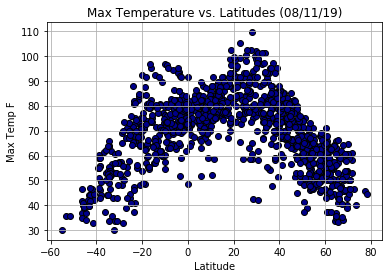

In [34]:
#Plotting Maximum temperature vs. Latitude
plt.scatter(weather_dataframe['Latitude'], weather_dataframe['Max Temp F'], marker = 'o', color = 'darkblue', edgecolor = 'black')
plt.title(f"Max Temperature vs. Latitudes ({time.strftime('%m') + '/' + time.strftime('%d') + '/' + time.strftime('%y')})")
plt.ylabel('Max Temp F')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Fig1.png')
plt.show()

In [42]:
######################################################################################################################

#### Latitude vs. Humidity Plot

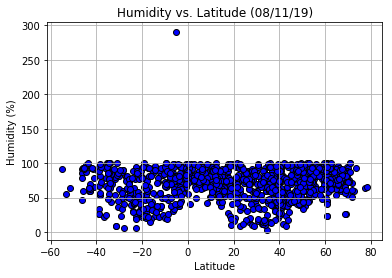

In [33]:
#Plotting Humidity vs. Latitude
plt.scatter(weather_dataframe['Latitude'], weather_dataframe['Humidity'], marker = 'o', color = 'blue', edgecolor = 'black')
plt.title(f"Humidity vs. Latitude ({time.strftime('%m') + '/' + time.strftime('%d') + '/' + time.strftime('%y')})")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Fig2.png')
plt.show()

In [44]:
######################################################################################################################

#### Latitude vs. Cloudiness Plot

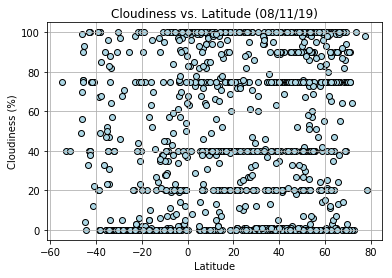

In [32]:
#Plotting Humidity vs. Latitude
plt.scatter(weather_dataframe['Latitude'], weather_dataframe['Cloudiness'], marker = 'o', color = 'lightblue', edgecolor = 'black')
plt.title(f"Cloudiness vs. Latitude ({time.strftime('%m') + '/' + time.strftime('%d') + '/' + time.strftime('%y')})")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Fig3.png')
plt.show()

In [46]:
######################################################################################################################

#### Latitude vs. Wind Speed Plot

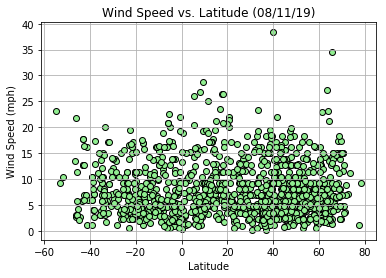

In [31]:
#Plotting Humidity vs. Latitude
plt.scatter(weather_dataframe['Latitude'], weather_dataframe['Wind Speed'], marker = 'o', color = 'lightgreen', edgecolor = 'black')
plt.title(f"Wind Speed vs. Latitude ({time.strftime('%m') + '/' + time.strftime('%d') + '/' + time.strftime('%y')})")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Fig4.png')
plt.show()

In [48]:
######################################################################################################################

/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


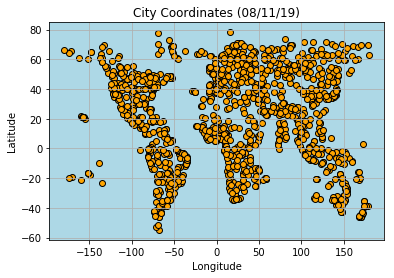

In [35]:
plt.scatter(weather_dataframe['Longitude'], weather_dataframe['Latitude'], marker = 'o', color = 'orange', edgecolor = 'black')
plt.title(f"City Coordinates ({time.strftime('%m') + '/' + time.strftime('%d') + '/' + time.strftime('%y')})")
background = plt.axes()
background.set_facecolor('lightblue')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.grid()
plt.savefig('CityCoordinates.png')
plt.show()
#save the scatter plot as an image file